In [7]:
import numpy as np
import matplotlib.pyplot as plt

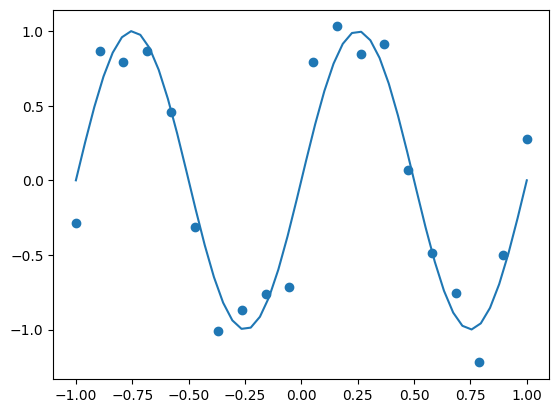

((17, 20), (20,), 2)

In [9]:
rng=np.random.default_rng(seed=12345)
n=20

x=np.linspace(-1,1,n)
y_true=np.sin(2*np.pi*x)

x_vis=np.linspace(-1,1)
y_vis=np.sin(2*np.pi*x_vis)

y=y_true+rng.normal(0,0.2,n)
plt.scatter(x,y)

plt.plot(x_vis,y_vis)
plt.show()

p=16
X=np.array([x**i for i in range(p+1)])  # create a feature matrix of 7x20
# print(X[6,:])

# plt.scatter(x,y_true,color='red')
# plt.plot(x,y_true)
# plt.show()
X.shape,y.shape,np.ndim(X)

In [ ]:
w=np.linalg.pinv(X.T)@y # this is for simple linear eq
np.linalg.pinv(X).shape

In [ ]:
d,n=X.shape
lamb=0.00001
w_ridge=np.linalg.pinv(X@X.T+lamb*np.eye(d))@X@y
w_ridge.shape

In [ ]:
y_vis_pred=np.array([x_vis**i for i in range(p+1)]).T@w_ridge
y_vis_pred

In [ ]:
plt.scatter(x,y,color='green')
plt.plot(x_vis,y_vis,color='purple')
plt.plot(x_vis,y_vis_pred,color='black')
# plt.plot(x_vis,y_vis_pred,color='red')
plt.show()

In [ ]:
def loss(X,y,w):
  d,n=X.shape
  err=X.T@w-y
  return (err**2).sum()/n

In [ ]:
loss(X,y,w)

In [ ]:
d,n=X.shape
w_grad=np.zeros(d)
eta=0.01
iter=0
loss_hist=[np.inf,0]
tol=1e-10

while abs(loss_hist[-1]-loss_hist[-2])>tol:
  loss_hist.append(loss(X,y,w_grad))
  grad=X@X.T@w_grad-X@y
  w_grad=w_grad-eta*grad
  iter+=1
print(iter,loss_hist[-1],w_grad)

In [ ]:
plt.plot(range(iter),loss_hist[2:])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
y_vis_pred=np.array([x_vis**i for i in range(p+1)]).T@w_grad
plt.scatter(x,y)
plt.scatter(x_vis,y_vis_pred)
plt.plot(x_vis,y_vis_pred,color='red')
plt.plot(x_vis,y_vis)
plt.show()

In [ ]:
loss(X,y,w_grad)
np.linalg.norm(w-w_grad)

In [ ]:
m=np.array([1,2,3])
X=np.array([1,2,5])
np.argmin(m-X),m-X

In [ ]:
def lr(x,y):
  return np.linalg.pinv(x@x.T)@x@y.sum()

In [ ]:
# def k_means(X,k):
#   d,n=X.shape
#   ind=rng.choice(np.arange(n),k,replace=False)
#   mus=X[:,ind]
#   z=np.zeros(n)
#   z_prev=np.ones(n)
#   while not np.array_equal(z,z_prev):
#     z_prev=z.copy()
#     for i in range(n):
#       dis=np.linalg.norm(X[:,i].reshape(2,1)-mus,axis=0)
#       z[i]=argmin(dis)
#     for j in range(k):
#       if np.any(z==j):
#         mus[:,j]=X[:,z==j].mean(axis=1)

# def pca(X):
#   d,n=X.shape
#   X=X-X.mean(axis=1).reshape(d,1)
#   C=X@X.T/n
#   eigval,eigvec=np.linalg.eigh(C)
#   return eigval,eigvec